In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: ylabel='proportion'>

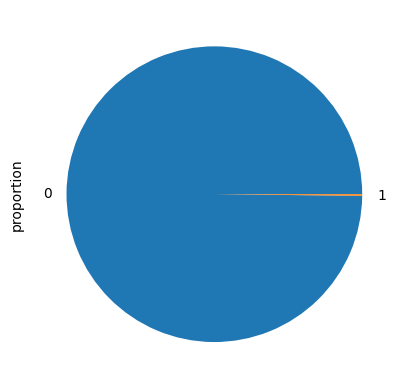

In [4]:
df.Class.value_counts(normalize=True).plot(kind='pie', color=['blue', 'red'])

In [5]:
df.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [6]:
df.drop("Time", axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = df.drop("Class", axis = 1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=666)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

#, kernel_regularizer=l2(0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, 
    y_train, 
    epochs=150, 
    batch_size=4000, 
    verbose=1, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
    )

Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5447 - loss: 2.7462 - val_accuracy: 0.7381 - val_loss: 1.8389
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6472 - loss: 1.8004 - val_accuracy: 0.9523 - val_loss: 1.1866
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7589 - loss: 1.1961 - val_accuracy: 0.9951 - val_loss: 0.7588
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.7850 - val_accuracy: 0.9989 - val_loss: 0.4711
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9512 - loss: 0.5013 - val_accuracy: 0.9993 - val_loss: 0.2868
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.3046 - val_accuracy: 0.9993 - val_loss: 0.1732
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.1815 - val_accuracy: 0.9992 - val_loss: 0.1090
Epoch 8/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.1145 - val_accuracy: 0.9989 - v

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step


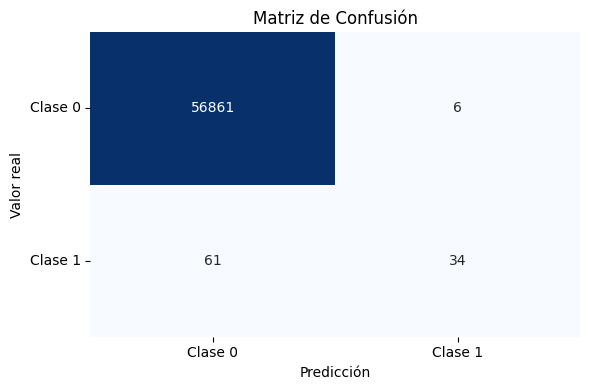

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Obtener las predicciones
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.6).astype(int)

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.xticks([0.5, 1.5], ['Clase 0', 'Clase 1'])
plt.yticks([0.5, 1.5], ['Clase 0', 'Clase 1'], rotation=0)
plt.tight_layout()
plt.show()

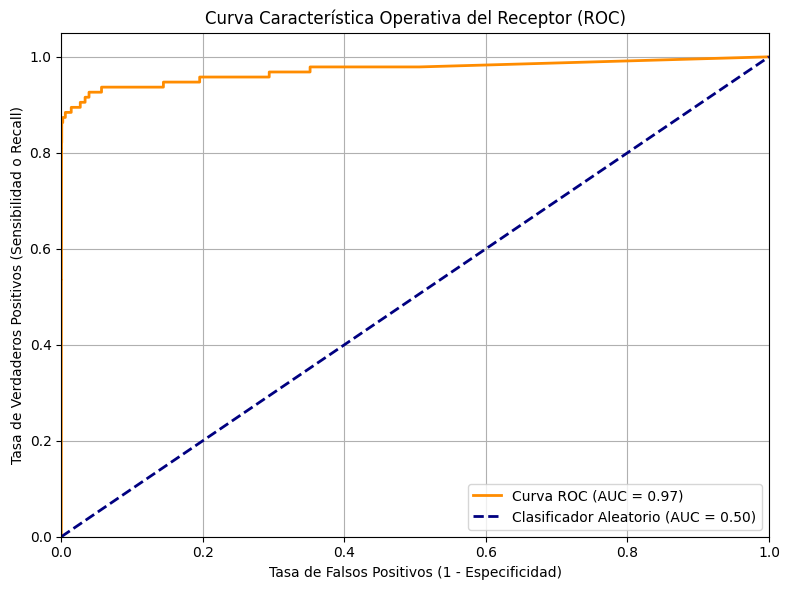

Área Bajo la Curva ROC (AUC): 0.9718


In [22]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio (AUC = 0.50)') # Línea de no discriminación
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) # Un poco más de 1.0 para que la línea no quede pegada al borde
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad o Recall)')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Área Bajo la Curva ROC (AUC): {roc_auc:.4f}")

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=666, sampling_strategy='auto') # 'auto' balancea la clase minoritaria a la mayoritaria
                                                      # Podrías usar un float ej: 0.5 para que la minoritaria sea el 50% de la mayoritaria

# Aplicamos SMOTE SOLO al conjunto de entrenamiento escalado
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Distribución de clases en y_train DESPUÉS de SMOTE:", Counter(y_train))
print("Shape de X_train_smote:", X_train.shape)
print("Shape de y_train_smote:", y_train.shape)

Distribución de clases en y_train DESPUÉS de SMOTE: Counter({0: 227448, 1: 227448})
Shape de X_train_smote: (454896, 29)
Shape de y_train_smote: (454896,)


In [25]:
#, kernel_regularizer=l2(0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
# Reentrenamos el modelo con los datos balanceados
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, 
    y_train, 
    epochs=150, 
    batch_size=4000, 
    verbose=1, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
    )

Epoch 1/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6227 - loss: 0.8538 - val_accuracy: 0.9790 - val_loss: 0.5037
Epoch 2/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.4186 - val_accuracy: 0.9806 - val_loss: 0.2778
Epoch 3/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9306 - loss: 0.2614 - val_accuracy: 0.9755 - val_loss: 0.1699
Epoch 4/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1879 - val_accuracy: 0.9744 - val_loss: 0.1289
Epoch 5/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - loss: 0.1542 - val_accuracy: 0.9727 - val_loss: 0.1141
Epoch 6/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9543 - loss: 0.1348 - val_accuracy: 0.9706 - val_loss: 0.1091
Epoch 7/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.1226 - val_accuracy: 0.9690 - val_loss: 0.1040
Epoch 8/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9601 - loss: 0.1133 - val_accu

In [26]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Obtener las predicciones del modelo
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # convertir probabilidades a etiquetas (umbral 0.5)

# Métricas detalladas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# También puedes imprimirlas individualmente si lo prefieres:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56867
           1       0.20      0.89      0.32        95

    accuracy                           0.99     56962
   macro avg       0.60      0.94      0.66     56962
weighted avg       1.00      0.99      1.00     56962

Accuracy: 0.9937
Precision: 0.1963
Recall: 0.8947
F1-score: 0.3220


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step


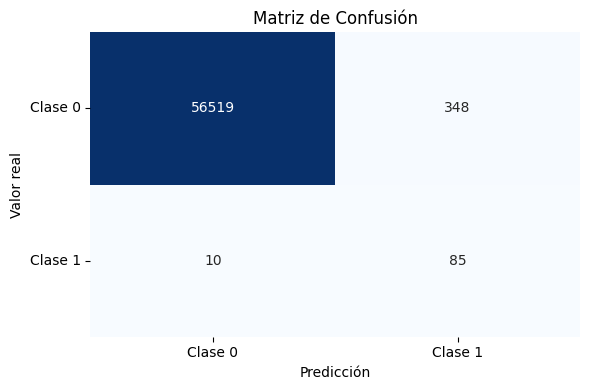

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Obtener las predicciones
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.xticks([0.5, 1.5], ['Clase 0', 'Clase 1'])
plt.yticks([0.5, 1.5], ['Clase 0', 'Clase 1'], rotation=0)
plt.tight_layout()
plt.show()

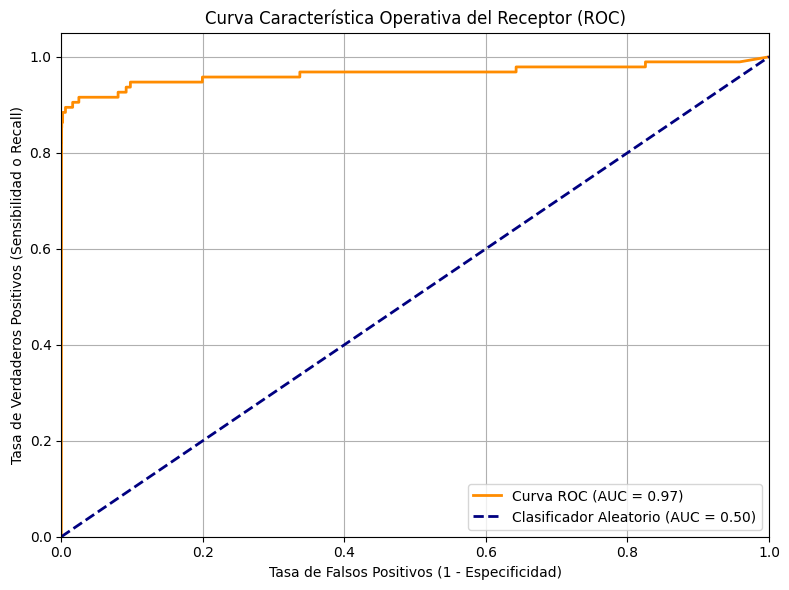

Área Bajo la Curva ROC (AUC): 0.9651


In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio (AUC = 0.50)') # Línea de no discriminación
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) # Un poco más de 1.0 para que la línea no quede pegada al borde
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad o Recall)')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Área Bajo la Curva ROC (AUC): {roc_auc:.4f}")